# <font color=blue>Analysis of Consumer Healthcare Costs</font>
>Project submission for Applied Statistics course as a part of the PGP-AIML programme

***
#### <font color=red>Author:</font> 
>Abhinav Kimothi


#### <font color=red> Project Description:</font> 
>With the rising healthcare costs, it becomes imperative for a medical insurance provider to carefully analyze the costs viz-a-viz the customer profile to better target and price potential customers. This project aims at exploring customer profiles and establishing their relationship with costs

#### <font color=red> Data:</font> 
>Medical Costs of individuals along with certain profile attributes


#### <font color=red>Metrics(KPIs):</font> 
>Medical Cost

#### <font color=red> Profile(Dimensions):</font>
> - Age
- Sex
- BMI
- Number of Children/Dependents
- Smoking Information 
- Region


#### Subsequently in the analysis, we will explore these profiles and try to establish insights into their medical costs
***
Let's first begin by __importing python libraries__ that will help us analyse this data

In [73]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import os
from matplotlib import pyplot as plt
from scipy.stats import ttest_1samp, ttest_ind, mannwhitneyu, levene, shapiro
from statsmodels.stats.power import ttest_power
from statsmodels.stats.proportion import proportions_ztest
import statsmodels.api as sm
from   statsmodels.formula.api import ols
from platform import python_version
print (python_version())

3.6.4


Next, we'll __read__ in the csv file __"insurance (2).csv"__ which has the data and store it as a __pandas DataFrame__ called __'Costs'__

In [2]:
Costs=pd.read_csv("insurance (2).csv")

Let's __preview__ the data before any analysis

In [3]:
Costs.head(5) ### shows the first five rows of the data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
Costs.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

***
> - Looks like there are __four numeric fields__ i.e. _'age' & 'children' are __integers__ and 'bmi'  & 'charges'_ are __float__
> - There's a case to be made here to analyse __'children'__ as a __categorical field__ rather than a continuous one. But, let's wait to see the statistical summary.
> - There are  __three string fields (objects)__ i.e. _'sex', 'smoker' & 'region'_
> - We can assume 'age' to be in __years__ & charges to be in __$ US__

***

Let's analyse them a little later, but first - __how many total records are there in the data and how many columns?__ Let's find out

In [5]:
Costs.shape

(1338, 7)

***
> -  Okay, the data contains records for __1338 individuals__. This might be good enough for us to make some statistical claims later in the analysis
> - We had also seen in the previews that there are __7 columns__ and it is reconfirmed here

***
Now let's first focus on the  __numeric variables__  and look at the __count, mean, standard deviation__ and the __5-number summary__

In [6]:
Costs.describe().T ###summarizes the distribution of numeric variables

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [7]:
print("Number of missing values for Age = " +str(Costs.age.isna().sum()))
print("Number of missing values for bmi = " +str(Costs.bmi.isna().sum()))
print("Number of missing values for children = " +str(Costs.children.isna().sum()))
print("Number of missing values for charges = " +str(Costs.charges.isna().sum()))


Number of missing values for Age = 0
Number of missing values for bmi = 0
Number of missing values for children = 0
Number of missing values for charges = 0


***
#### Certain observations can be made by just looking at the above statistics
***
> - We notice that __none__ of the four numeric field have a missing value
>> - This is important because othewise we would've had to perform exclusions or missing value imputations - but, none of that here

> - The data is for individuals who are __more than 18 years of age__, and includes individuals till the__age of 64__. That's quite a __wide range__
> > - Though the __mean__ is around __39 years__, there's a __high standard deviation__ in age indicating a __high spread__
>> - The __mean and the median are fairly close__ to each other which implies a __symmetric distribution__ with __negligible skew__
>> - The 5 number summary suggests __no outliers__

> - Similarly, __BMI__ ranges from __15.96__ to __53.13__
> > - In the case of BMI, the __standard deviation is low__ compared to the mean. BMI must be __fairly centered__ around the mean
>> - The __mean and the median are fairly close__ to each other which implies a __symmetric distribution__ with __negligible skew__
>> - The 5 number summary suggests __outliers on both ends__

> - The __number of children/dependents__ has a small range from __0__ to __5__
>> - It is also noteworthy that though the highest number of children/dependents is five, __at least 3/4th__ of the sample has __two children/dependents or less__ and __at least 1/4th__ of the sample has __no children/dependents__
>> - <font color=red>There is case to be made here, that since children/dependent has only a few unique values, it should be treated as a categorical variable</font>

> - __Charges__, the metric of importance to us, has a wide range from __about 1100__ to __more than 63000__

>> - We can observe that the __median (around 9382)__ is much __smaller__ compared to the __mean (around 13270)__. This implies a __high right skew__
>> - There is a  __high standard deviation__ ; actually almost inching towards the mean. There is __high spread__ amongst charges
>> - The 5 number summary suggests __outliers on the higher end__

***

__It makes sense here to substantiate the above observations through charts and more statistics__

Lets try to __visualize the distributions__ of the three continuous variables and also __validate__ our claims above about the __skew__

Distribution of Age


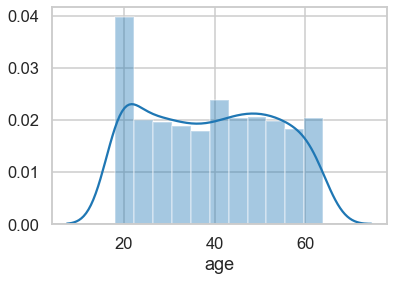

Skew of Age distribution is 0.05567251565299186


In [9]:
print("Distribution of Age")
sns.set_style("whitegrid")
sns.set_context("talk")
sns.distplot(Costs.age)
plt.show()
print("Skew of Age distribution is " + str(Costs.age.skew()))

Distribution of BMI


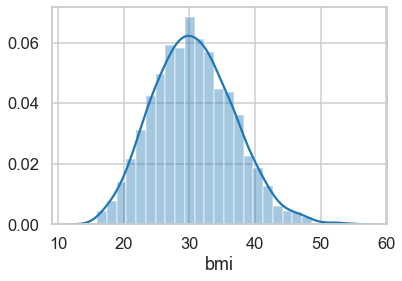

Skew of BMI distribution is 0.2840471105987448


In [10]:
print("Distribution of BMI")

sns.distplot(Costs.bmi)
plt.show()
print("Skew of BMI distribution is " + str(Costs.bmi.skew()))

Distribution of Charges


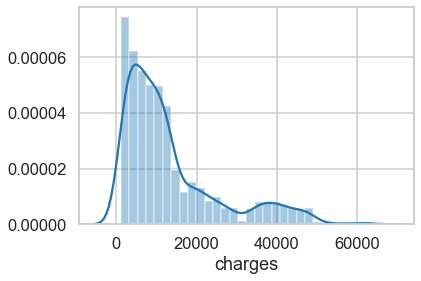

Skew of Charges distribution is 1.5158796580240388


In [11]:
print("Distribution of Charges")
sns.distplot(Costs.charges)
plt.show()
print("Skew of Charges distribution is " + str(Costs.charges.skew()))

***
#### Great! It looks like our earlier inferences on skew hold for the three continuous variables. The visual representation enhances our knowledge about the distribution
***
>   __AGE__ : While we do infer that the __skew is minimal (0.05, almost no skew)__, it is also worthwhile to notice that the distribution of age in the data is __not normal__. It's closer to a uniform distribution.

>  __BMI__ : The distribution has a __marginal right skew (0.28)__

> __Charges__ : There is a  __high degree of right skew (1.5)__

***
#### __Skewed data__ increases the chances of an __outlier__. It doesn't mean the unskewed data can't have outliers. 
__It is always important to understand the outliers in the data, as they might render our inference incorrect. The treatment of outliers shall remain a subjective call__

__Let's now look at a visual box plot that will help us identify the outliers in the data__

Box Plot for Charges


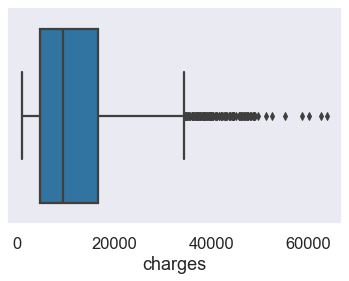

As per the 'Median +/- 1.5 times IQR
For Charges there are 0 outliers on the lower side
For Charges there are 181 outliers on the upper side


In [16]:
print("Box Plot for Charges")
sns.set_style("dark")
sns.boxplot(Costs.charges)

plt.show()
print("As per the 'Median +/- 1.5 times IQR")
print("For Charges there are " + 
      str(len(Costs[Costs.charges<(Costs.charges.median()-1.5*(np.percentile(Costs.charges,75) - np.percentile(Costs.charges,25)))])) + " outliers on the lower side")
print("For Charges there are " + 
      str(len(Costs[Costs.charges>(Costs.charges.median()+1.5*(np.percentile(Costs.charges,75) - np.percentile(Costs.charges,25)))])) + " outliers on the upper side")



Box plot for Age


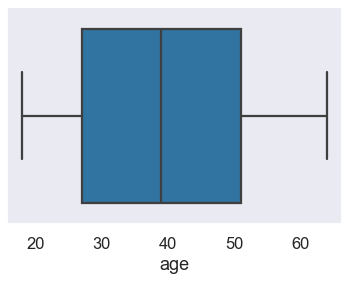

As per the 'Median +/- 1.5 times IQR
For Age there are 0 outliers on the lower side
and 0 outliers on the upper side


In [17]:
print("Box plot for Age")
sns.boxplot(Costs.age)
plt.show()

print("As per the 'Median +/- 1.5 times IQR")
print("For Age there are " + 
      str(len(Costs[Costs.age<(Costs.age.median()-1.5*(np.percentile(Costs.age,75) - np.percentile(Costs.age,25)))])) + " outliers on the lower side")
print("and " + 
      str(len(Costs[Costs.age>(Costs.age.median()+1.5*(np.percentile(Costs.age,75) - np.percentile(Costs.age,25)))])) + " outliers on the upper side")


Box plot for BMI


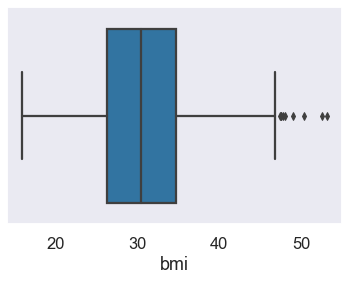

As per the 'Median +/- 1.5 times IQR
For BMI there are 13 outliers on the lower side
and 34 outliers on the upper side


In [18]:
print("Box plot for BMI")
sns.boxplot(Costs.bmi)
plt.show()

print("As per the 'Median +/- 1.5 times IQR")
print("For BMI there are " + 
      str(len(Costs[Costs.bmi<(Costs.bmi.median()-1.5*(np.percentile(Costs.bmi,75) - np.percentile(Costs.bmi,25)))])) + " outliers on the lower side")
print("and " + 
      str(len(Costs[Costs.bmi>(Costs.bmi.median()+1.5*(np.percentile(Costs.bmi,75) - np.percentile(Costs.bmi,25)))])) + " outliers on the upper side")


#### The box plot reveals important facts about these continuous variables

***
>   __AGE__ : There are __no outliers__ on either side

>  __BMI__ : There are __thirty four__ values more than __42.99__ and __thirteen__ values below __17.8__

> __Charges__ : There are __no outliers on the lower side__ and __181__ values more than __27231__

***


### That was about the continuous variables, but let's not forget that there are four categorical variables too

> - Sex
> - Region
> - Smoker
> - Number of Children/Dependents

 __Let's first look at the distribution of these__

In [19]:
Costs.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

In [20]:
Costs.region.value_counts()

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

In [21]:
Costs.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [22]:
Costs.children.value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

__We can observe here__
> - __Sex__: Almost an __equal distribution__ with 14 more males than females
> - __Region__:  __Slightly skewed towards southeast__ with other three regions almost equal
> - __Smokers__: About __20% smokers__ and __80% non-smokers__
> - __Number of children/dependents__ : __43% have no dependents__ and __42% have either 1 or 2 dependents__

__The best way to look at this distribution is through count plots__

Count plot for Sex


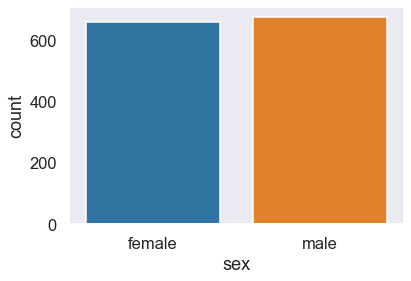

In [23]:
print("Count plot for Sex")



sns.countplot(Costs.sex)
plt.show()


Count plot for Region


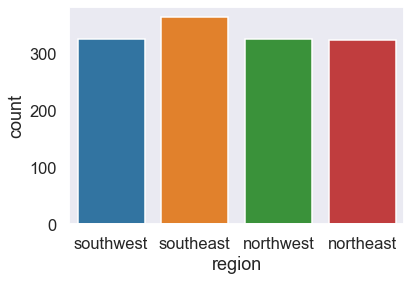

In [24]:
print("Count plot for Region")

sns.countplot(Costs.region)
plt.show()

Count plot for Smoking


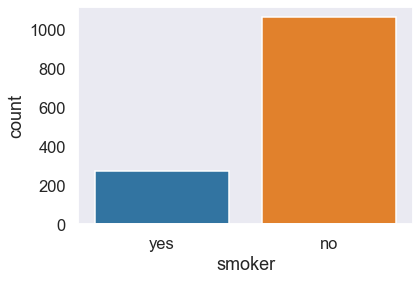

In [25]:
print("Count plot for Smoking")

sns.countplot(Costs.smoker)
plt.show()

Count plot for Number of Children/Dependent


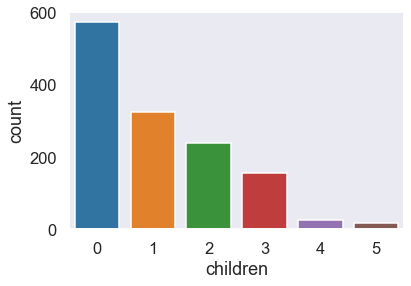

In [26]:
print("Count plot for Number of Children/Dependent")

sns.countplot(Costs.children)
plt.show()

#### Our observations above have been represented in a visual manner
****
### Till now we have looked into univariate distributions. Now let's look into bivariate relationships. This will help us in making inferences on our metric of choice
***
__Firstly, let's explore bivariate relationships amongst the numeric fields (including children)__

Bivariate relationships of all numeric fields


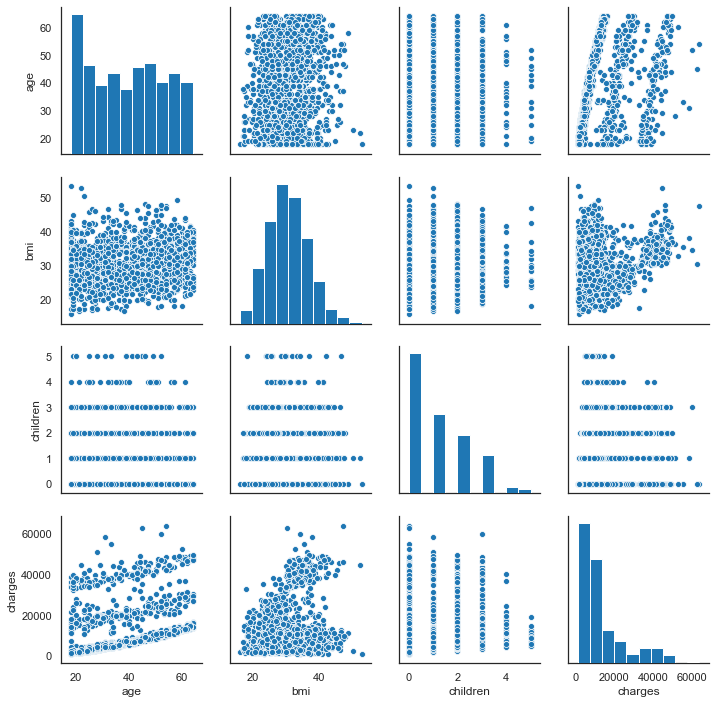

In [27]:
print("Bivariate relationships of all numeric fields")
sns.set_context("notebook")
sns.set_style("white")
sns.pairplot(Costs)
plt.show()

__We can use catplots to explore relationships amongst categorical data__

Between Smoker and Region


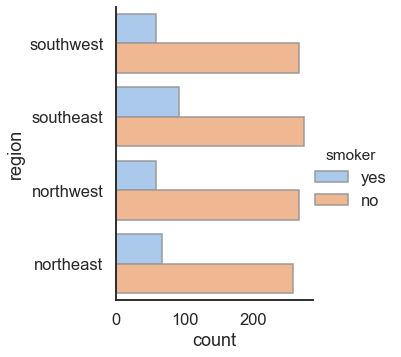

In [28]:
print("Between Smoker and Region")
sns.set_context("talk")
sns.catplot(y="region", hue="smoker", kind="count",
            palette="pastel", edgecolor=".6",
            data=Costs)
plt.show()

Between Sex and Region


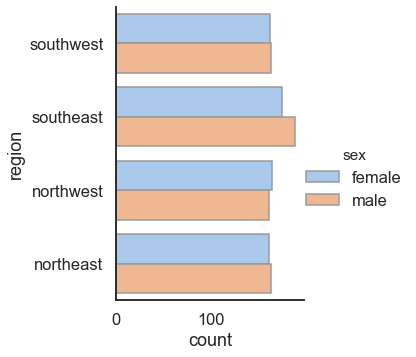

In [29]:
print("Between Sex and Region")
sns.catplot(y="region", hue="sex", kind="count",
            palette="pastel", edgecolor=".6",
            data=Costs)
plt.show()

Between Sex and Smoker


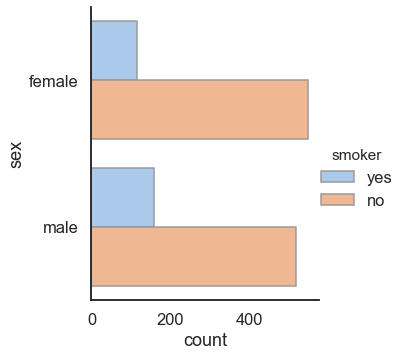

In [30]:
print("Between Sex and Smoker")
sns.catplot(y="sex", hue="smoker", kind="count",
            palette="pastel", edgecolor=".6",
            data=Costs)
plt.show()

Between Sex and Children


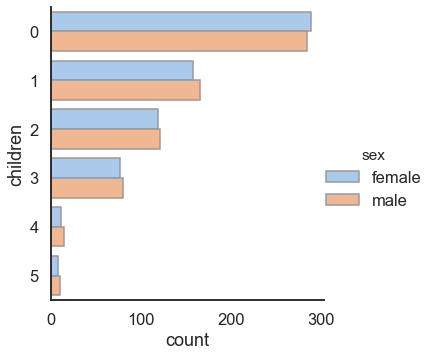

In [31]:
print("Between Sex and Children")
sns.catplot(y="children", hue="sex", kind="count",
            palette="pastel", edgecolor=".6",
            data=Costs)
plt.show()

Between Region and Children


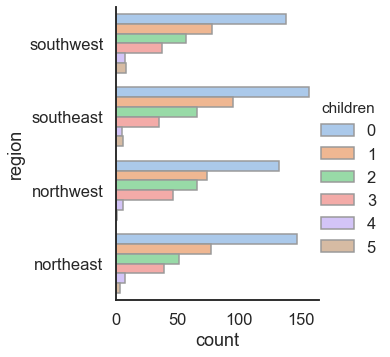

In [32]:
print("Between Region and Children")
sns.catplot(y="region", hue="children", kind="count",
            palette="pastel", edgecolor=".6",
            data=Costs)
plt.show()

Between Smoking and Children


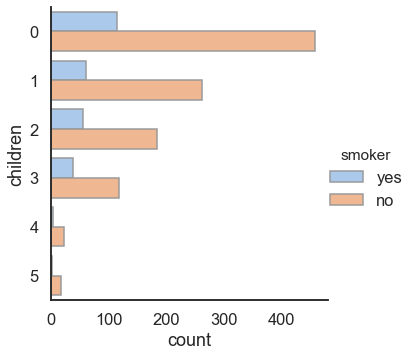

In [33]:
print("Between Smoking and Children")
sns.catplot(y="children", hue="smoker", kind="count",
            palette="pastel", edgecolor=".6",
            data=Costs)
plt.show()

__We will now use barplots to understand the bivariate relationships between one categorical and one continuous variable__

Between Smoking and Charges


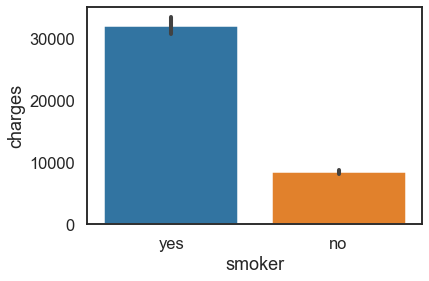

In [34]:
print("Between Smoking and Charges")
sns.barplot(Costs.smoker, Costs.charges)
plt.show()

Between Region and Charges


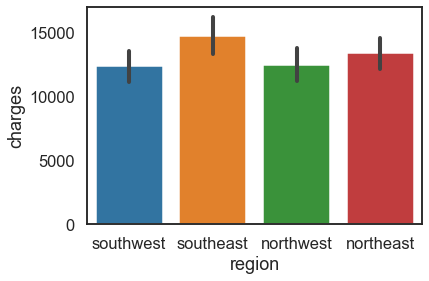

In [35]:
print("Between Region and Charges")
sns.barplot(Costs.region, Costs.charges)
plt.show()

Between Sex and Charges


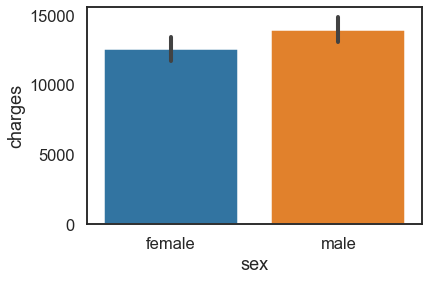

In [36]:
print("Between Sex and Charges")
sns.barplot(Costs.sex, Costs.charges)
plt.show()

Between Sex and BMI


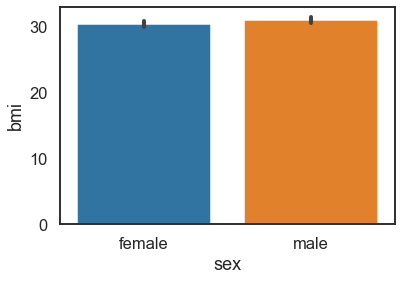

In [37]:
print("Between Sex and BMI")
sns.barplot(Costs.sex, Costs.bmi)
plt.show()

Between Sex and Age


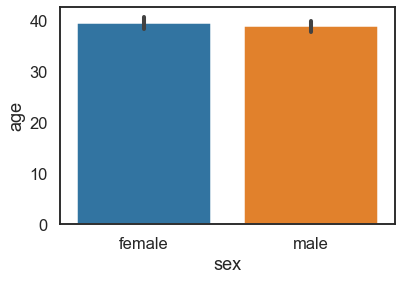

In [38]:
print("Between Sex and Age")
sns.barplot(Costs.sex, Costs.age)
plt.show()

Between Region and BMI


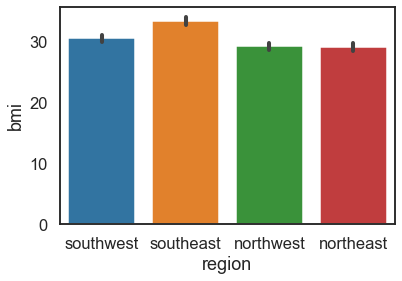

In [39]:
print("Between Region and BMI")
sns.barplot(Costs.region, Costs.bmi)
plt.show()

Between Region and Age


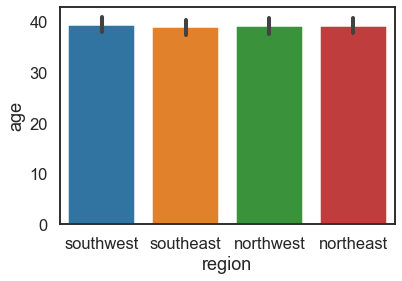

In [40]:
print("Between Region and Age")
sns.barplot(Costs.region, Costs.age)
plt.show()

Between Smoking and Age


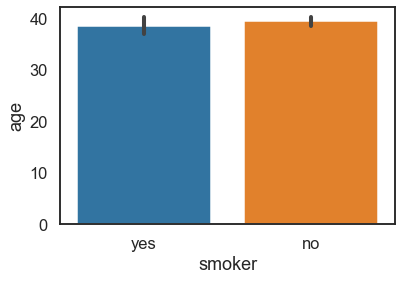

In [41]:
print("Between Smoking and Age")
sns.barplot(Costs.smoker, Costs.age)
plt.show()

Between Smoking and BMI


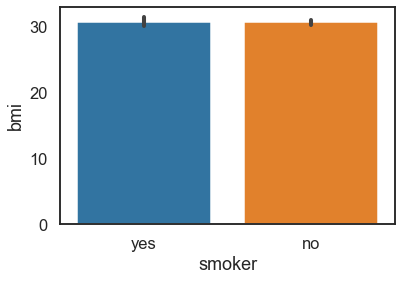

In [42]:
print("Between Smoking and BMI")
sns.barplot(Costs.smoker, Costs.bmi)
plt.show()

## There are some valuable observations to be made here
***

> - __Charges increase with age__ in three distinct groups
> - There is __no apparant relationship between age and BMI__
> - __South East Region__ has a __higher__ number of __Smokers__ and __Males__
> - There are __more male smokers__ than females
> - __Smokers__ in total __pay >three times more charges__ than non-smokers
> - __Charges are higher__ in __South East__ followed by __North East__
> - __Males pay more average charges__ than females
> - __Average age__ is __similar across Sex__ 
> - __South East Region__ has a __higher average BMI__
> - __Average age__ & __average BMI__ is __similar across Smokers and Non-Smokers__ 

***
## Now that we have looked at the univariate and the bivariate distributions, it is time to form some hypotheses and test them


### __Let's begin with looking at the relationship between smoking and costs__
####  We saw above in the chart that people who smoke pay more. Now let's test it statistically

__Question__. Do charges of people who smoke differ significantly from the people who don't?

We will compare the __average charges__ of __smoker=yes__ and __smoker=no__

__Null Hypothesis__: mean(charges) of smoker(yes) = mean(charges) of smoker(yes)

__Alternate Hypothesis__: mean(charges) of smoker(yes) != mean(charges) of smoker(yes)

__We can apply a two sample t-test__ (or if the samples aren't normally distributed a __two-sample wilcoxon test__)

__Smokers__ and __non-smokers__ are __independent groups__

__Let's pull the chart again__

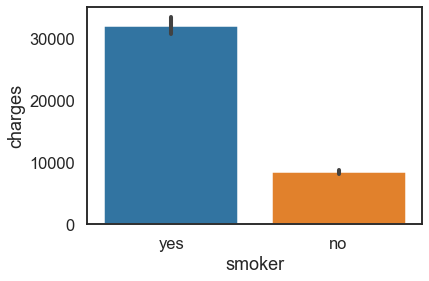

In [43]:
sns.barplot(Costs.smoker, Costs.charges)
plt.show()

In [44]:
Costs.groupby('smoker')['charges'].agg(['mean','count','std'])

,mean,count,std
smoker,,,
no,8434.268298,1064,5993.781819
yes,32050.231832,274,11541.547176


In [45]:
Costs.charges.agg(['mean','count','std'])

mean     13270.422265
count     1338.000000
std      12110.011237
Name: charges, dtype: float64

__Let's divide our population charges into smokers and non-smokers__

In [46]:
smoker_charges=Costs[Costs['smoker']=='yes']['charges']
non_smoker_charges=Costs[Costs['smoker']=='no']['charges']

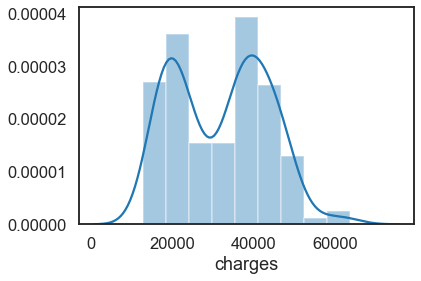

(0.9395521879196167, 3.6251879276250065e-09)

In [47]:
sns.distplot(smoker_charges)
plt.show()
shapiro(smoker_charges)

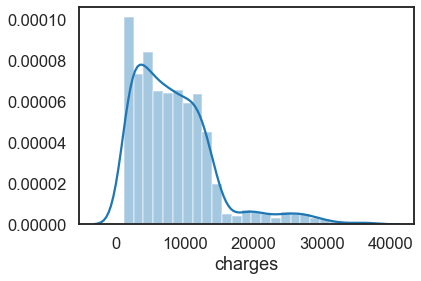

(0.8728628158569336, 1.4455900162299346e-28)

In [48]:
sns.distplot(non_smoker_charges)
plt.show()
shapiro(non_smoker_charges)

#### <font color='blue'>__The two samples are not normally distributed__</font>

__Still, let's apply a two sample t-test__

__Smokers__ and __non-smokers__ are __independent groups__

__Null Hypothesis__: mean(charges) of smoker(yes) = mean(charges) of smoker(yes)

__Alternate Hypothesis__: mean(charges) of smoker(yes) != mean(charges) of smoker(yes)

__the smaller the p-value we get, with greater confidence we can reject the null hypothesis and say that the mean is different__

In [49]:
t_stat, pvalue=ttest_ind(smoker_charges, non_smoker_charges)

In [50]:
print("The p-value is "+ str(pvalue))

The p-value is 8.271435842177219e-283


As we observe here, the __pvalue <.0001__ we can say __even with 99.99% confidence, the charges for smokers are not the same as charges for non-smokers__


__But,__ we observe from distributions above that samples are __not normally distributed__ Let's try and apply __the two-sample wilcoxon test__ to these samples

In [51]:
u, p_value = mannwhitneyu(smoker_charges, non_smoker_charges)
print ("two-sample wilcoxon-test p-value=", p_value)

two-sample wilcoxon-test p-value= 2.6351167222517853e-130


__The samples are not normally distributed and we can claim with more then 99.99% confidence that the charges for smokers are not the same as the charges for non-smokers__

Infact, by looking at the means, we can claim that __the charges for smokers are higher than charges for non-smokers__ by more than 3.5 times


#### <font color='red'> In summary, we can claim with more than 99.99% confidence that the charges for smokers are higher than the charges for non-smokers
***

### Now let's look another relationship,  between Sex and BMI
####  We visually observed above in a chart that BMI doesn't vary a lot with Sex. Now let's test it statistically

__Question__. Does bmi of males differ significantly from that of females?

We will compare the __average BMI__ of __sex=male__ and __sex=female__

__Null Hypothesis__: mean(bmi) of sex(male) = mean(bmi) of sex(female)

__Alternate Hypothesis__: mean(bmi) of sex(male) != mean(bmi) of sex(female)

__We can apply a two sample t-test__ (or if the samples aren't normally distributed a __two-sample wilcoxon test__)

__Male__ and __Female__ are __independent groups__

__Let's pull the chart again__

Between Sex and BMI


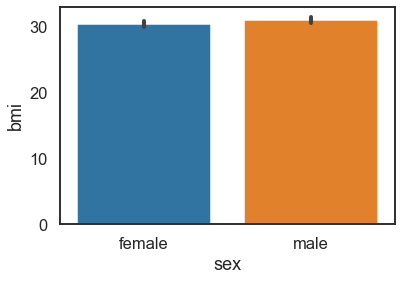

In [52]:
print("Between Sex and BMI")
sns.barplot(Costs.sex, Costs.bmi)
plt.show()

In [53]:
Costs.groupby('sex')['bmi'].agg(['mean','count','std'])

,mean,count,std
sex,,,
female,30.377749,662,6.046023
male,30.943129,676,6.140435


In [54]:
Costs.bmi.agg(['mean','count','std'])

mean       30.663397
count    1338.000000
std         6.098187
Name: bmi, dtype: float64

__Let's divide our population charges into smokers and non-smokers__

In [55]:
female_bmi=Costs[Costs['sex']=='female']['bmi']
male_bmi=Costs[Costs['sex']=='male']['bmi']

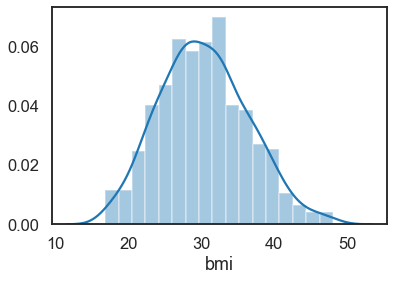

(0.9930257797241211, 0.0035433683078736067)

In [56]:
sns.distplot(female_bmi)
plt.show()
shapiro(female_bmi)

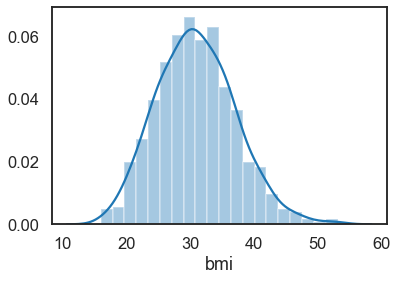

(0.9930475354194641, 0.003130641533061862)

In [57]:
sns.distplot(male_bmi)
plt.show()
shapiro(male_bmi)

#### <font color='blue'>The two samples are not normally distributed</font>

__Still, let's apply a two sample t-test__

__Male__ and __Female__ are __independent groups__

__Null Hypothesis__: mean(bmi) of sex(male) = mean(bmi) of sex(female)

__Alternate Hypothesis__: mean(bmi) of sex(male) != mean(bmi) of sex(female)

__the smaller the p-value we get, with greater confidence we can reject the null hypothesis and say that the mean is different__

In [58]:
t_stat, pvalue=ttest_ind(male_bmi, female_bmi)

In [59]:
print("The p-value is "+ str(pvalue))

The p-value is 0.08997637178984932


__But,__ we observe from distributions above that samples are __not normally distributed__ Let's try and apply __the two-sample wilcoxon test__ to these samples

In [60]:
u, p_value = mannwhitneyu(male_bmi, female_bmi)
print ("two-sample wilcoxon-test p-value=", p_value)

two-sample wilcoxon-test p-value= 0.05070064020142721


As we observe here, the __pvalue >.05__, which means __even with 95% confidence we <font color='blue'>cannot</font> reject the null hypothesis__ 
> - Therefore, __at 95% CI, the BMI for males and females is <font color='blue'> not different </font>__

However, __pvalue<.051__, which means __at 94.9% confidence we <font color='blue'>can</font> reject the null hypothesis__
> - Therefore, __at 94.9% CI, the BMI for males <font color='blue'> is more </font> than the BMI for females__


#### <font color='red'> In summary, we can claim with 94.9% confidence that BMI for males is higher than the BMI for females. However, the same is not true at 95% confidence interval
***



### Now let's look at another type of relationship,  the distribution of proportions. Here, let's evaluate the proportion of smokers across sex

#### We visually observed above in a chart there is a higher proportion of male smokers than females. Now let's test it statistically

__Question__. Is the proportion of smokers significantly different in different genders?

We will compare the __%smokers__ of __sex=male__ and __sex=female__

__Null Hypothesis__: %smoker(yes) of sex(male) = %smoker(yes) of sex(female)

__Alternate Hypothesis__: %smoker(yes) of sex(male) != %smoker(yes) of sex(female)

__We can apply a test of proportions__

__Let's pull the chart again__


Between Sex and Smoker


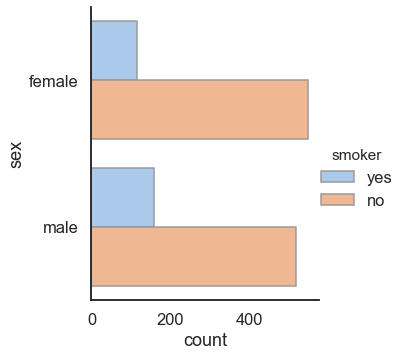

In [61]:
print("Between Sex and Smoker")
sns.catplot(y="sex", hue="smoker", kind="count",
            palette="pastel", edgecolor=".6",
            data=Costs)
plt.show()

In [62]:
female_smokers = Costs[Costs['sex'] == 'female'].smoker.value_counts()[1]  # number of female smokers
male_smokers = Costs[Costs['sex'] == 'male'].smoker.value_counts()[1] # number of male smokers
n_females = Costs.sex.value_counts()[1] # number of females in the data
n_males = Costs.sex.value_counts()[0] #number of males in the data

In [63]:
print ("Number of Females = ", n_females)
print ("Number of Males = ", n_males)
print ("Number of Female Smokers = ", female_smokers)
print ("Number of Male Smokers = ", male_smokers)


print(f'Proportion of smokers in females, males = {round(female_smokers/n_females,3)*100}%, {round(male_smokers/n_males,3)*100}%, respectively')



Number of Females =  662
Number of Males =  676
Number of Female Smokers =  115
Number of Male Smokers =  159
Proportion of smokers in females, males = 17.4%, 23.5%, respectively


__Let's apply a test of proportions__

Ho = The proportions are equal

Ha = The two proportions are not equal

In [64]:
stat, pval = proportions_ztest([female_smokers, male_smokers] , [n_females, n_males])

In [65]:
print("The pvalue is ",pval)

The pvalue is  0.005324114164320532


As we observe here, the __pvalue <.006__, which means __with 99.4% confidence we <font color='blue'>can</font> reject the null hypothesis__ 
> - Therefore, __at 99.4% CI, the proportion of smokers in males <font color='blue'> is higher </font> than the proportion of smokers in females__

#### <font color='red'> In summary, we can claim with more than 99.4% confidence that the proportion of smokers amongst males is higher than the proportion of smokers amongst females
***

### Finally, let's compare the distributions across more than two groups. Here we'll compare the distribution of BMI in Females across the number of children

####  Let's first visualize this



In [66]:
Costs_Fem=Costs[(Costs.sex=='female') & (Costs.children<=2)]

BMI across number of children/dependents for Females


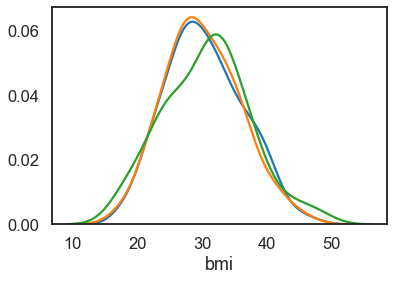

In [67]:
print("BMI across number of children/dependents for Females")
sns.distplot(Costs_Fem[Costs_Fem.children==0]['bmi'], hist=False, rug=False)
sns.distplot(Costs_Fem[Costs_Fem.children==1]['bmi'], hist=False, rug=False)
sns.distplot(Costs_Fem[Costs_Fem.children==2]['bmi'], hist=False, rug=False)

plt.show()

__Visually, we can't distinguish much except that for Children=0 & Children=1, the distribution is almost similar. Let's test this statistically__

First, let's find the mean BMI and the standard deviations in the groups

In [68]:
Costs_Fem.groupby('children')['bmi'].agg(['mean', 'count', 'std'])

,mean,count,std
children,,,
0,30.361522,289,5.966934
1,30.052658,158,5.786831
2,30.649790,119,6.628200


__In order to compare the distributions, we will compare the means of the three distributions using ANOVA test__

Here the __null hypothesis__ is that __all the means are same__
Therefore, __alternate hypothesis__ is that __at least one mean is different__

To rely on ANOVA we must check __two assumptions__
> - __Variance__ of the three distributions is equal: We'll check this using __Levene Test__
> - __Normality__ holds in the three distributions: We'll check this using __Shapiro Wilk Test__

In [69]:
levene(Costs_Fem[Costs_Fem.children==0]['bmi'],Costs_Fem[Costs_Fem.children==1]['bmi'],Costs_Fem[Costs_Fem.children==2]['bmi'])

LeveneResult(statistic=0.9433311607108589, pvalue=0.3899432394522804)

__Levene Test__ assumes equality of variance. The above result shows a __high pvalue__ which means that we __cannot reject the null hypothesis__ and we can claim that __variance of the three samples is not different__

In [70]:
print(shapiro(Costs_Fem[Costs_Fem.children==0]['bmi']))
print(shapiro(Costs_Fem[Costs_Fem.children==1]['bmi']))
print(shapiro(Costs_Fem[Costs_Fem.children==2]['bmi']))

(0.9896312355995178, 0.03757598251104355)
(0.9921025037765503, 0.5361911654472351)
(0.9860439300537109, 0.2596229910850525)


__At 99% Confidence Interval we can claim that the samples are normally distributed__

In [71]:
mod = ols('bmi ~ children', data = Costs_Fem).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                sum_sq     df         F   PR(>F)
children      2.512982    1.0  0.068411  0.79376
Residual  20717.738725  564.0       NaN      NaN


__The p-value above is .79376__ hence we __cannot reject the null hypothesis__ 

#### <font color='red'>Therefore, we can claim that the means of BMI amongst females with zero, one and two children is not different</font>
***

### This brings us to the conclusion of this analysis.
### There are, of course, many other hypotheses that can be made and tested on this data.
### I hope you enjoyed. 

#### Please [drop me a note](mailto:abhinavkimothi145@gmail.com) with your comments